In [1]:
import pandas as pd
import numpy as np
from functools import reduce

epidemic_dir = "epidemic/"
import warnings
warnings.filterwarnings("ignore")

import plotly as py
import plotly.express as px
import plotly.graph_objs as go

import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\crystallwi.xiaujing\AppData\Local\Continuum\anaconda3\envs\env01\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\crystallwi.xiaujing\AppData\Local\Continuum\anaconda3\envs\env01\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\crystallwi.xiaujing\AppData\Local\Continuum\anaconda3\envs\env01\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
## Functions 
def check_missing(df):
    return print( df.isnull().sum() )

def get_min_max_date(df):
    min_date = df.date.min().date()
    max_date = df.date.max().date()
    print (f'Min date: {min_date} ')
    print (f'Max date: {max_date} ')

### IDEAS:
* Of the daily Covid cases, how many are hospitalised?
* Of the daily Covid cases, how many are in the PKRC?
* Time loss from work for PKRC quarantine.

## Cases

In [3]:
cases = pd.read_csv(epidemic_dir +'cases_malaysia.csv')
cases.head()
cases['date'] = pd.to_datetime(cases['date'])
print ('Cases---')
cases.describe()

## Data wrangling
cases.replace(np.nan, 0, inplace=True)
cases.head()
print (get_min_max_date(cases))
check_missing(cases)

Cases---
Min date: 2020-03-16 
Max date: 2021-07-23 
None
date                       0
cases_new                  0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64


In [4]:
## Number of cases by state
states = pd.read_csv(epidemic_dir + 'cases_state.csv')
states['date'] = pd.to_datetime(states['date'])
states.head()
get_min_max_date(states)
check_missing(states)
states['state'] = states['state'].astype('str').astype('category')

Min date: 2020-03-16 
Max date: 2021-07-23 
date         0
state        0
cases_new    0
dtype: int64


## Deaths

In [5]:
deaths_malaysia = pd.read_csv(epidemic_dir + 'deaths_malaysia.csv')
deaths_malaysia['date'] = pd.to_datetime(deaths_malaysia['date'])
check_missing(deaths_malaysia)
get_min_max_date(deaths_malaysia)

## Data wrangling 
deaths_malaysia['year'] = deaths_malaysia['date'].map(lambda x: x.year)
deaths_malaysia['month'] = deaths_malaysia['date'].map(lambda x:x.month)
deaths_malaysia['day'] = deaths_malaysia['date'].map(lambda x:x.day)


date          0
deaths_new    0
dtype: int64
Min date: 2020-03-17 
Max date: 2021-07-23 


In [6]:
import datetime as dt
deaths_state = pd.read_csv(epidemic_dir + 'deaths_state.csv')
deaths_state['date'] = pd.to_datetime(deaths_state['date'])
check_missing(deaths_state)
get_min_max_date(deaths_state)

## Data wrangling 
deaths_state['year'] = deaths_state['date'].map(lambda x: x.year)
deaths_state['month'] = deaths_state['date'].map(lambda x:x.month)
deaths_state['day'] = deaths_state['date'].map(lambda x:x.day)

date          0
state         0
deaths_new    0
dtype: int64
Min date: 2020-03-17 
Max date: 2021-07-23 


## Hospital & ICU

In [7]:
hospital = pd.read_csv(epidemic_dir + "hospital.csv")
icu = pd.read_csv(epidemic_dir+ "icu.csv")

print ('---------Hospitals Dataset --------')
hospital.state.value_counts()
print ('\n', hospital.columns)
print (hospital.describe(include='all'))
hospital['date'] = pd.to_datetime(hospital['date'])

print ('\n ------- Available hospital bed ----')
state_hospital_bed = hospital.groupby('state')['beds'].max()
print (state_hospital_bed)

print ('\n ---------- ICU Dataset ----------')
icu['date'] = pd.to_datetime(icu['date'])
print (icu.describe(include='all'))
print (icu.dtypes)
print (icu.shape)
icu_by_state = icu.state.value_counts()
print (icu_by_state)

---------Hospitals Dataset --------

 Index(['date', 'state', 'beds', 'beds_noncrit', 'admitted_pui',
       'admitted_covid', 'admitted_total', 'discharged_pui',
       'discharged_covid', 'discharged_total', 'hosp_covid', 'hosp_pui',
       'hosp_noncovid'],
      dtype='object')
              date              state         beds  beds_noncrit  \
count         7363               7363  7363.000000   7363.000000   
unique         486                 16          NaN           NaN   
top     2021-06-27  W.P. Kuala Lumpur          NaN           NaN   
freq            16                486          NaN           NaN   
mean           NaN                NaN  1884.747929   1815.651229   
std            NaN                NaN  1203.180905   1158.975342   
min            NaN                NaN   122.000000     95.000000   
25%            NaN                NaN  1158.000000   1124.000000   
50%            NaN                NaN  1454.000000   1381.000000   
75%            NaN                NaN

In [8]:
print ("Cases ---")
get_min_max_date(cases)
print ("\n")
check_missing(cases)

print ("\n Hospital ---")
get_min_max_date(hospital)
print ("\n")
check_missing(hospital)

print("\n ICU ---")
get_min_max_date(icu)
print ("\n")
check_missing(icu)

Cases ---
Min date: 2020-03-16 
Max date: 2021-07-23 


date                       0
cases_new                  0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64

 Hospital ---
Min date: 2020-03-24 
Max date: 2021-07-22 


date                0
state               0
beds                0
beds_noncrit        0
admitted_pui        0
admitted_covid      0
admitted_total      0
discharged_pui      0
discharged_covid    0
discharged_total    0
hosp_covid          0
hosp_pui            0
hosp_noncovid       0
dtype: int64

 ICU ---
Min date: 2020-03-24 
Max date: 2021-07-22 


date             0
state            0
bed_icu          0
bed_icu_rep      0
bed_icu_total    0
bed_icu_covid    0
vent             0
vent_port        0
icu_covid        0
icu_pui          0
icu_noncovid     0
vent_covid       0
vent_pui         0
vent_no

## PKRC

PKRC describes the movement of patients in and out of Covid-19 Quarantine Centre, with capacity and utilisation each day. 

In [9]:
pkrc = pd.read_csv(epidemic_dir+ "pkrc.csv")
pkrc['date'] = pd.to_datetime(pkrc['date'])

print ("PKRC---")
get_min_max_date(pkrc)
check_missing(pkrc)
print(pkrc.describe())
pkrc.tail()


PKRC---
Min date: 2020-03-28 
Max date: 2021-07-22 
date               0
state              0
beds               0
admitted_pui       0
admitted_covid     0
admitted_total     0
discharge_pui      0
discharge_covid    0
discharge_total    0
pkrc_covid         0
pkrc_pui           0
pkrc_noncovid      0
dtype: int64
               beds  admitted_pui  admitted_covid  admitted_total  \
count   5471.000000   5471.000000     5471.000000     5471.000000   
mean    1594.633157      1.760190       71.383294       73.143484   
std     2448.078388      5.689006      174.185404      175.157427   
min       26.000000      0.000000        0.000000        0.000000   
25%      117.000000      0.000000        0.000000        0.000000   
50%      600.000000      0.000000        7.000000        9.000000   
75%     1660.000000      1.000000       61.000000       63.000000   
max    11212.000000    190.000000     2040.000000     2042.000000   

       discharge_pui  discharge_covid  discharge_total   pkrc

,date,state,beds,admitted_pui,admitted_covid,admitted_total,discharge_pui,discharge_covid,discharge_total,pkrc_covid,pkrc_pui,pkrc_noncovid
5466,2021-07-22,Sabah,6711,15,362,377,33,282,315,2891,66,0
5467,2021-07-22,Sarawak,8003,13,89,102,2,92,94,2352,194,0
5468,2021-07-22,Selangor,9639,1,259,260,0,323,323,2212,5,1
5469,2021-07-22,Terengganu,1508,23,135,158,8,82,90,863,88,0
5470,2021-07-22,W.P. Labuan,441,3,35,38,3,4,7,152,43,0


In [10]:
pkrc_bed_by_state = pd.DataFrame(pkrc.groupby(['state'])['beds'].max())
pkrc_bed_by_state.sort_values('beds', ascending=False)

,beds
state,
Selangor,11212
Sabah,9546
Sarawak,9202
Johor,4383
Negeri Sembilan,3197
Pahang,2908
Kelantan,2763
Terengganu,2742
Penang,2031


## Covid-19 Testing

In [11]:
tests = pd.read_csv(epidemic_dir + 'tests_malaysia.csv')
tests['date'] = pd.to_datetime(tests['date'])

tests.head()
tests.rename(columns={' pcr':'pcr', ' rtk-ag':'rtk-ag'}, inplace=True)
tests.columns
px.line(tests, x='date', y='pcr', title = "Number of PCR-tests per day")
px.line(tests, x='date', y='rtk-ag', title = 'Number of RTK-Ag tests per day')

In [12]:
# Data Quality Tests
get_min_max_date(tests)
check_missing(tests)

Min date: 2020-01-24 
Max date: 2021-07-22 
date      0
rtk-ag    0
pcr       0
dtype: int64


## Data Merging (cases, tests, deaths)

In [13]:
list_df = [cases, tests, deaths_malaysia, pkrc]
df_merged = reduce(lambda x, y: pd.merge(x, y, on= 'date'), list_df)

In [14]:
print ('Number of rows: %s \n' %format(df_merged.shape[0]))
print ('number of missing values: %s \n'  %format(df_merged.isnull().sum()))
get_min_max_date(df_merged)

Number of rows: 5471 

number of missing values: date                       0
cases_new                  0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
rtk-ag                     0
pcr                        0
deaths_new                 0
year                       0
month                      0
day                        0
state                      0
beds                       0
admitted_pui               0
admitted_covid             0
admitted_total             0
discharge_pui              0
discharge_covid            0
discharge_total            0
pkrc_covid                 0
pkrc_pui                   0
pkrc_noncovid              0
dtype: int64 

Min date: 2020-03-28 
Max date: 2021-07-22 


## Visualisation

In [15]:
cases['cumulative_cases'] = cases['cases_new'].cumsum()

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=cases.date, y= cases.cases_new, name = 'daily_new_cases', \
    line = dict(color='#D6C5E0', width = 1)))
fig.add_trace(go.Scatter(x=cases.date, y= cases.cumulative_cases, name = 'Cumulative daily cases', 
                         line=dict(color='#461B6A', width=1)))
fig.update_layout(title ='Number of Daily Cases in Malaysia')
fig.show()


In [16]:
px.line(states, x= 'date', y= 'cases_new', color= 'state', title= 'Daily cases by state')

In [17]:
deaths_malaysia.columns
deaths_state.columns

Index(['date', 'state', 'deaths_new', 'year', 'month', 'day'], dtype='object')

In [18]:

deaths_malaysia['cumulative_deaths'] = deaths_malaysia['deaths_new'].cumsum()

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=deaths_malaysia.date, y= deaths_malaysia.deaths_new, name = 'daily_deaths', \
    line = dict(color='#D50000', width = 1)))
fig.add_trace(go.Scatter(x=deaths_malaysia.date, y= deaths_malaysia.cumulative_deaths, name = 'Cumulative daily deaths', 
                         line=dict(color='#CA0000', width=1)))
fig.update_layout(title ='Number of Daily Deaths in Malaysia')
fig.show()


In [19]:
px.line(deaths_state, x= 'date', y= 'deaths_new', color= 'state', title= 'Daily deaths by state')

In [20]:
total_deaths_by_state = deaths_state.copy()
total_deaths_by_state = pd.DataFrame(total_deaths_by_state.groupby('state')['deaths_new'].sum())
total_deaths_by_state

,deaths_new
state,
Johor,770
Kedah,323
Kelantan,255
Melaka,299
Negeri Sembilan,620
Pahang,208
Perak,173
Perlis,8
Pulau Pinang,159


In [21]:
total_deaths_by_state.reset_index(inplace=True)
total_deaths_by_state.columns

Index(['state', 'deaths_new'], dtype='object')

In [22]:
px.bar(total_deaths_by_state, x='state', y='deaths_new')

In [23]:
deaths_by_month = deaths_malaysia.copy()
deaths_by_month = deaths_by_month.groupby (['year','month'])['deaths_new'].sum()
deaths_by_month = pd.DataFrame(deaths_by_month)
deaths_by_month.reset_index(inplace=True)
deaths_by_month.head()
px.bar(deaths_by_month, x='month', y='deaths_new', color='year', title='Number of deaths by month since 2020')

In [24]:
px.line(df_merged, 'date', 'pcr', title = 'PCR Tests daily')

In [25]:
df_plot = df_merged.copy()
df_plot['cumulative_deaths'] = df_plot['deaths_new'].cumsum()
df_plot['cumulative_cases'] = df_plot['cases_new'].cumsum()
df_plot['cumulative_pcr'] = df_plot['pcr'].cumsum()
df_plot['cumulative_rtk-ag'] = df_plot['rtk-ag'].cumsum()
df_plot['daily_rate_of_cases'] = df_plot['cases_new'].diff()
df_plot['pcr_rate_of_tests'] = df_plot['pcr'].diff()

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=df_plot.date, y= df_plot.daily_rate_of_cases, 
                         name = 'Rate of Daily cases', \
    line = dict(color='#4CA500', width = 1)))
fig.add_trace(go.Scatter(x=df_plot.date, y= df_plot.pcr_rate_of_tests, 
                         name = 'Rate of PCR Tests', 
                         line=dict(color='#CA0000', width=1)))
fig.update_layout(title ='Rate of change of daily cases with daily PCR testing')
fig.show()


Text(0.5, 1.0, 'Correlation Heatmap')

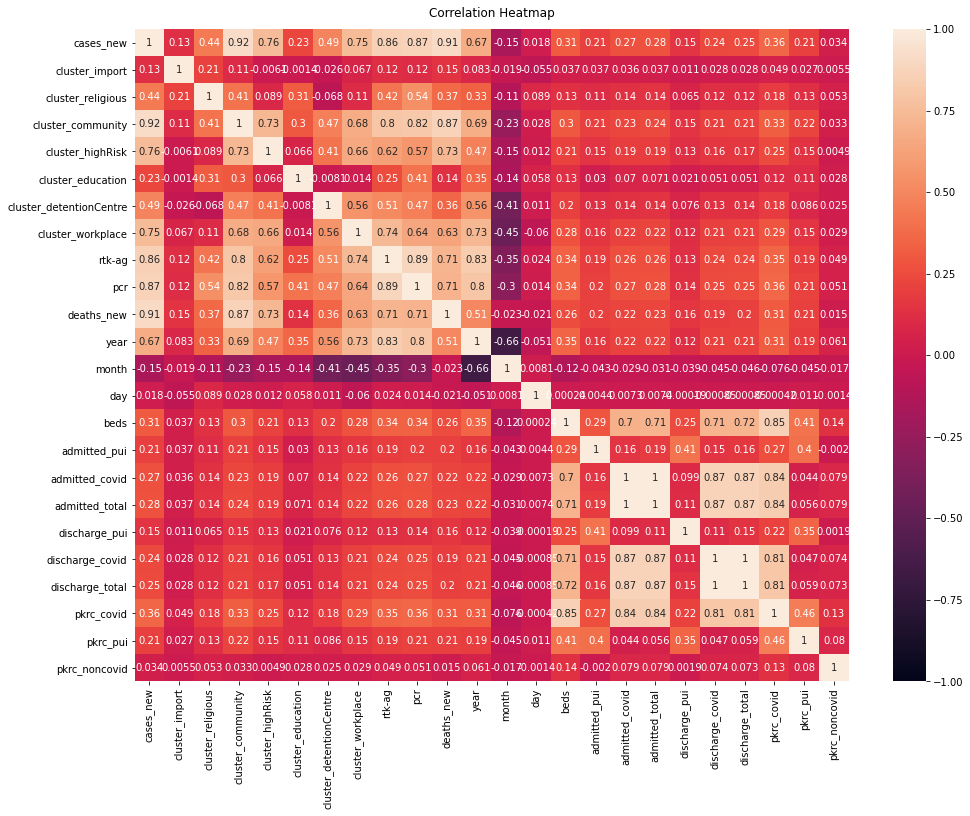

In [28]:
## Correlation plot
plt.figure(figsize=(16, 12))

heatmap = sns.heatmap(df_merged.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)